In [1]:
%matplotlib inline
import sys
import os
DATA_PATH = os.getenv('DATA_PATH')
CODE_PATH = os.getenv('CODE_PATH')
FIGURE_PATH = os.getenv('FIGURE_PATH')

sys.path.insert(0, os.path.join(CODE_PATH))

import pandas as pd
import numpy as np
import json
import re

import time

from src.load import EGRID, BA_DATA

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from calendar import month_abbr

import logging.config
logging.config.fileConfig(os.path.join(CODE_PATH, "src/logging.conf"))
logger = logging.getLogger(__name__)
                           
COLORS = sns.color_palette('muted')

In [2]:
#plt.style.use('seaborn-paper')
plt.rcParams['figure.figsize'] = [6.99, 2.5]
plt.rcParams['grid.color'] = 'k'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.size'] = 10

import cmocean
cmap = cmocean.cm.cmap_d['phase']

In [3]:
# Set font sizes
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 9

# column sizes
cm_to_in = 0.393701
col_width3 = cm_to_in * 17.8
col_width2 = cm_to_in * 11.4
col_width1 = cm_to_in * 5.3

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', linewidth=.5)  # fontsize of the figure title
plt.rc('xtick.minor', width=.5)  # fontsize of the figure title
plt.rc('xtick.major', width=.5)  # fontsize of the figure title
plt.rc('ytick.minor', width=.5)  # fontsize of the figure title
plt.rc('ytick.major', width=.5)  # fontsize of the figure title


In [4]:
co2 = BA_DATA(fileNm=os.path.join(DATA_PATH, "analysis/SEED_CO2_H.csv"), variable="CO2")
elec = BA_DATA(fileNm=os.path.join(DATA_PATH, "analysis/SEED_E_H.csv"), variable="E")
co2i = BA_DATA(fileNm=os.path.join(DATA_PATH, "analysis/SEED_EFs_CO2_H.csv"), variable="CO2i")

In [5]:
d = elec
count = 0
count2 = 0
cols = []
for i, ba in enumerate(d.regions[0:-1]):
    for ba2 in d.regions[i+1:]:
        col = d.KEY["ID"] % (ba,ba2)
        if col in d.df.columns:
            count += 1
            r = abs(d.df.loc[:, col].sum())/ d.df.loc[:, col].abs().sum()
            if r<.8:
                print("%s-%s: %.2f" % (ba,ba2, r))
                count2 += 1
                cols += [col]
print("%d out of %d links have more than 20%% reverse flows" % (count2, count))

AEC-SOCO: 0.59
AECI-SWPP: 0.53
AVA-GCPD: 0.13
AVA-PACW: 0.23
BANC-TIDC: 0.16
BPAT-IPCO: 0.20
CHPD-DOPD: 0.10
CISO-NEVP: 0.71
CISO-TIDC: 0.75
CPLE-DUK: 0.15
CPLE-SC: 0.65
CPLE-YAD: 0.09
DUK-SEPA: 0.02
DUK-SOCO: 0.60
EEI-TVA: 0.56
ERCO-SWPP: 0.08
FPC-GVL: 0.16
FPC-TEC: 0.69
FPL-JEA: 0.52
IPCO-PACW: 0.60
ISNE-NYIS: 0.78
LGEE-MISO: 0.17
LGEE-OVEC: 0.73
PNM-SWPP: 0.17
PSCO-SWPP: 0.50
PSEI-SCL: 0.04
SC-SEPA: 0.04
SCEG-SEPA: 0.71
SEC-TEC: 0.69
SWPP-WACM: 0.06
WACM-WAUW: 0.72
31 out of 152 links have more than 20% reverse flows


# Plot the ones above 1 GW

EBA.CPLE-DUK.ID.H: 42.36%
EBA.CPLE-SC.ID.H: 82.63%
EBA.DUK-SOCO.ID.H: 79.88%
EBA.FPC-TEC.ID.H: 84.56%
EBA.IPCO-PACW.ID.H: 79.92%
EBA.ISNE-NYIS.ID.H: 11.04%
EBA.LGEE-OVEC.ID.H: 86.30%
7


/opt/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


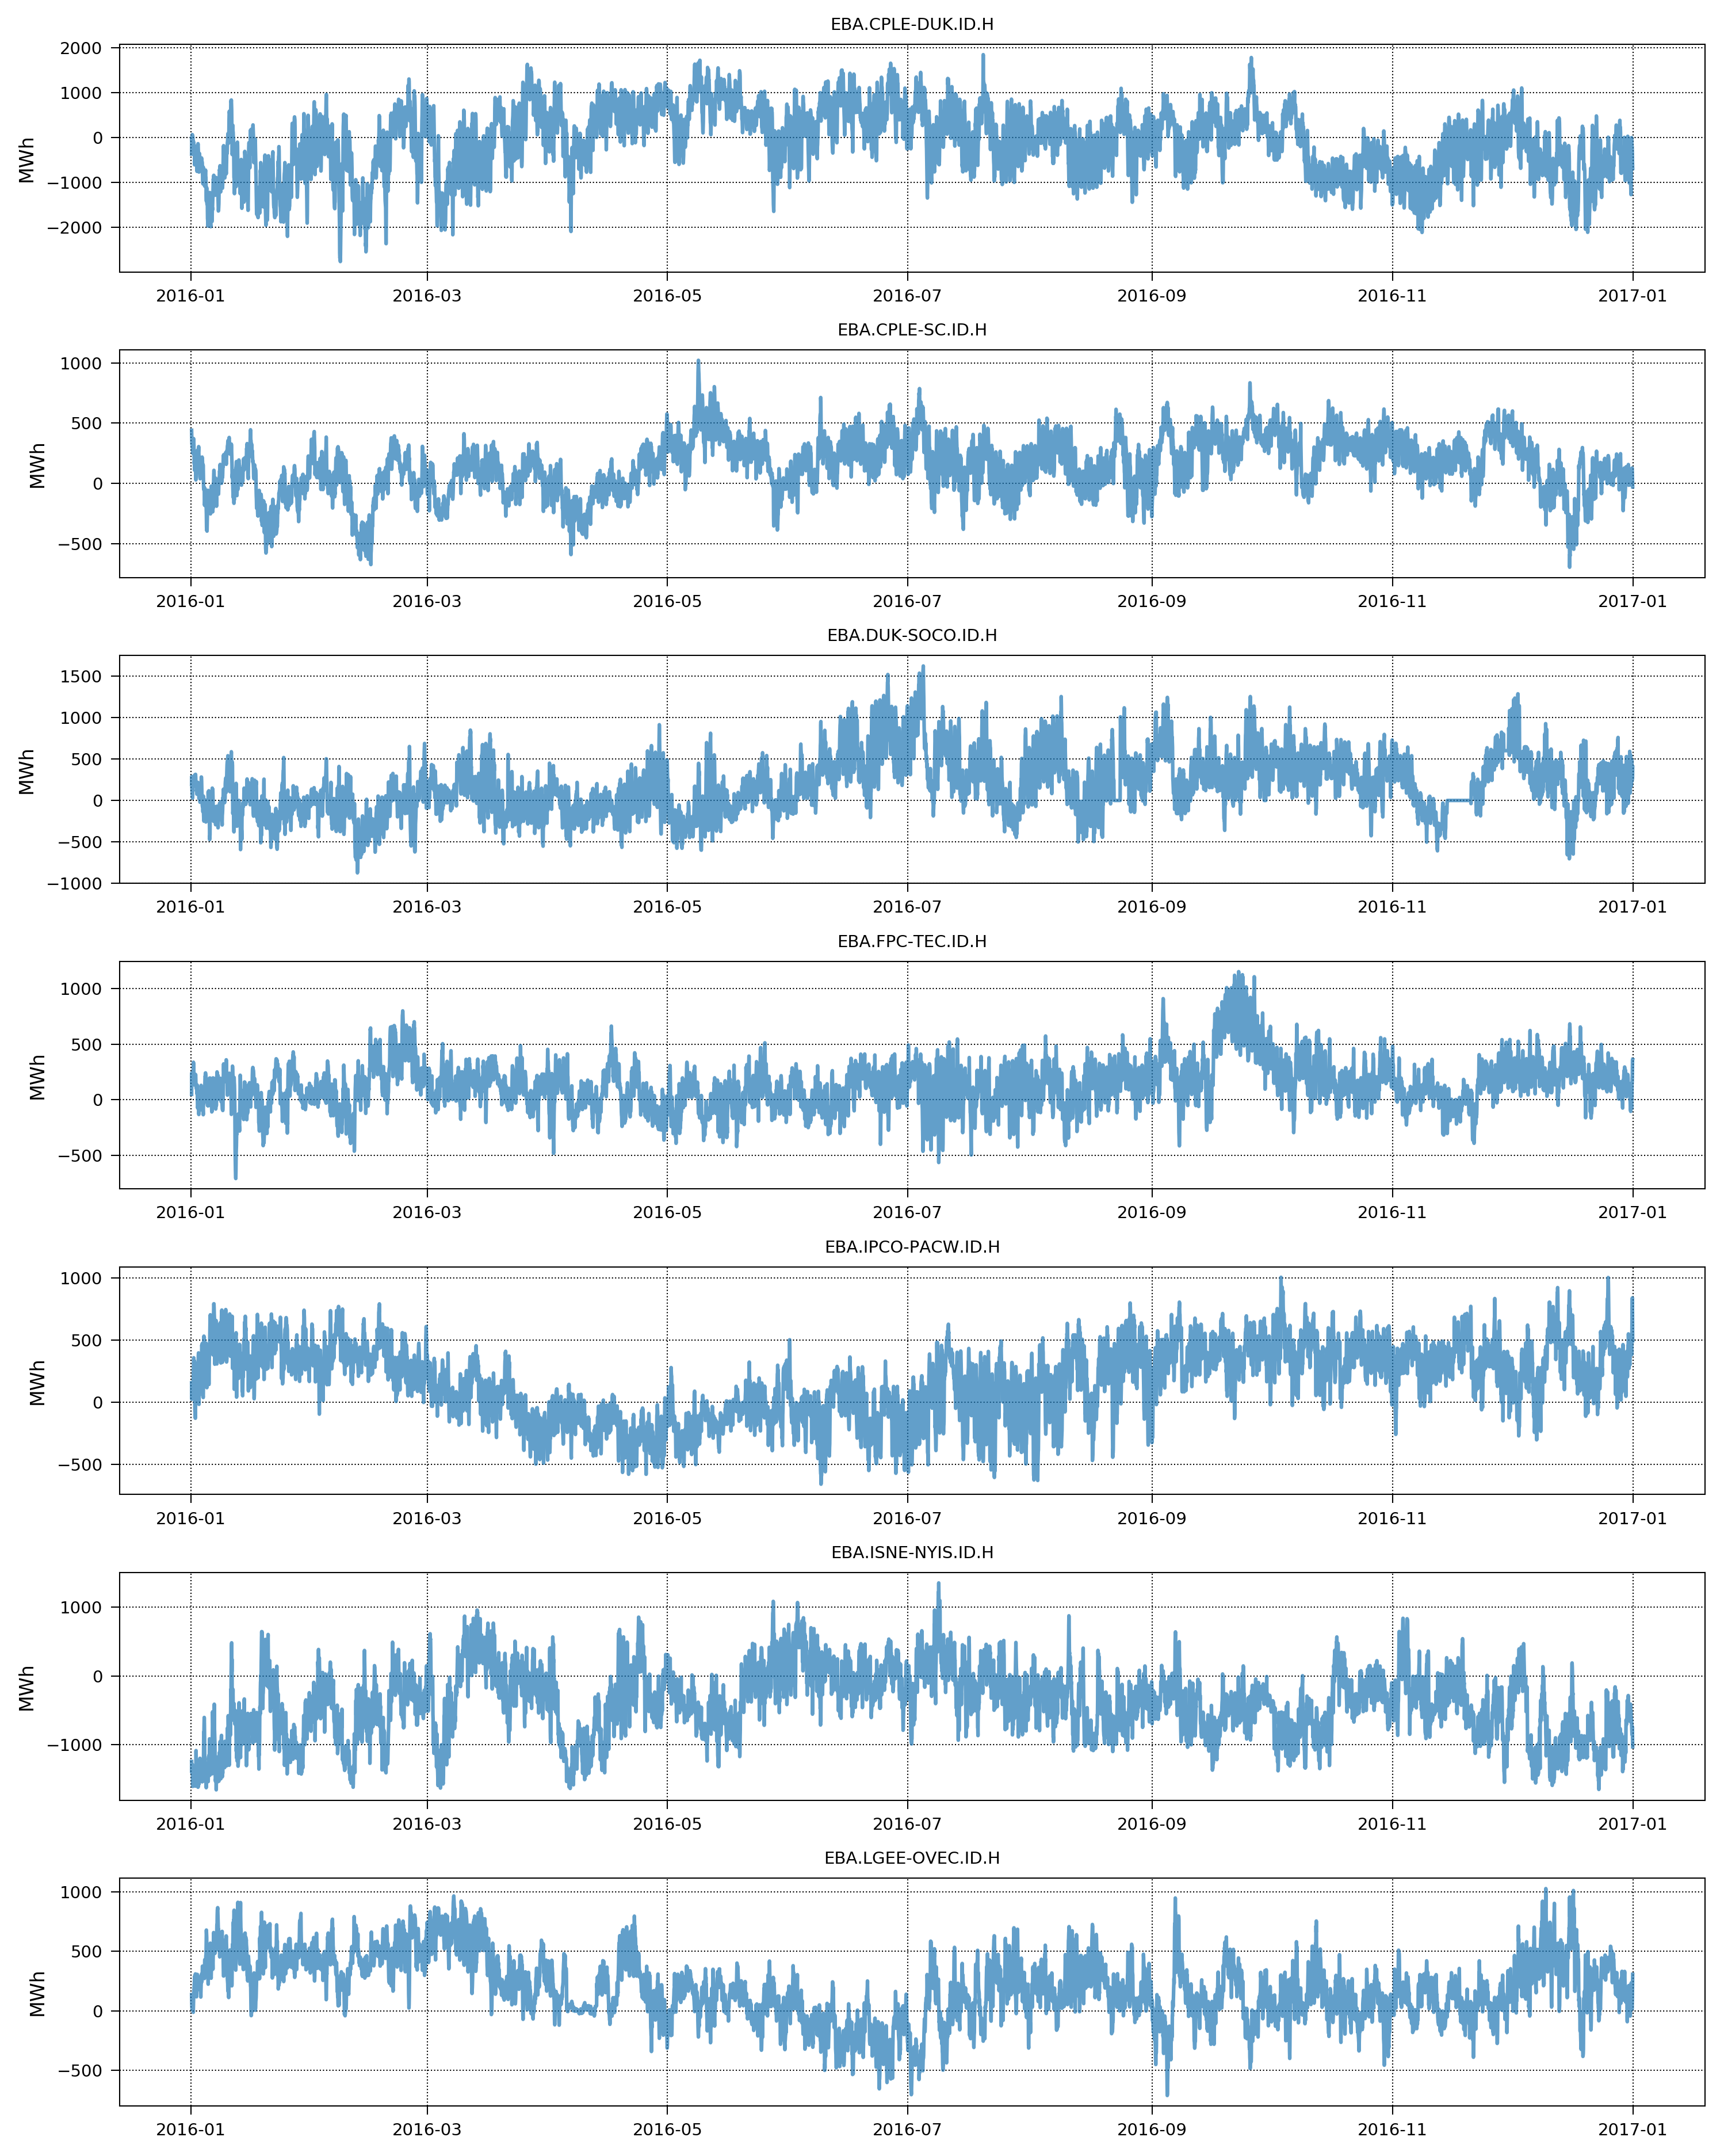

In [6]:
f, ax = plt.subplots(7,1, figsize=(10, 12.5))

cnt = 0
for col in cols:
    s = d.df.loc[:, col]
    if (s.max()>1000):
        cnt += 1
        ax[cnt-1].plot(s, label=col, alpha=.7)
        print("%s: %.2f%%" % (col, 100*s[s>0].sum()/ s.abs().sum()))
        ax[cnt-1].set_ylabel("MWh")
        ax[cnt-1].set_title(col)
#ax[].legend()
print(cnt)
plt.tight_layout()
f.savefig(os.path.join(FIGURE_PATH, "si", "back_forth.pdf"))